# Mining Software Repositories: OpenStack Nova Project.

### Goal

The goal of this tool and analysis is to help in capturing insights from the commits on a project repo, in this case: the openstack nova project repo. This will help in understanding the project as well as provide guidiance to contributors and maintainers.

### Objectives

The following questions will be answered:
* Find the most actively modified module?
* How many commits occured during the studied period?
* How much churn occurred during the studied period? Churn is defined as the sum of added and removed lines by all commits.

**NB**: This workflow is responsible for the pre-processing, analysis, and generation of insight from the collected data. It is assumed that the automated collection of the data via the script accessible in thesame folder with this notebook has been completed. The collected data will be loaded here before the other process in the workflow executes.

### Required imports:

In [1]:
# Built-in libraries
import json
import os

# The normal data science ecosystem libraries
# pandas for data wrangling
import pandas as pd

# Plotting modules and libraries required
import matplotlib as mpl
import matplotlib.pyplot as plt

### Required settings:

In [2]:
# Settings:
# 1. Command needed to make plots appear in the Jupyter Notebook
%matplotlib inline

# 2. Command needed to make plots bigger in the Jupyter Notebook
plt.rcParams['figure.figsize']= (12, 10)

# 3. Command needed to make 'ggplot' styled plots- professional and yet good looking theme.
plt.style.use('ggplot')

# 4. This will make the plot zoomable
# mpld3.enable_notebook()

### Other utility functions for data manipulation

In [3]:
# Utility data manipulation functions

# 1. Extract path parameters from filename
def path_parameters(dframe):
     filename = os.path.basename(dframe["filename"])
     filetype = os.path.splitext(dframe["filename"])[1]
     directory = os.path.dirname(dframe["filename"])
     
     return directory, filename, filetype

### 1. Loading the data

In [4]:
# Open and load json file
with open('data.json', encoding="utf8") as file:
    data = json.load(file)
    print("data loaded successfully")

data loaded successfully


### Data normalization

The collected commit data is a semi-structured json which has nested data similar to the image below. Files is a list of file objects. The loaded data will be normalized into a flat table using pandas.json_normalize.


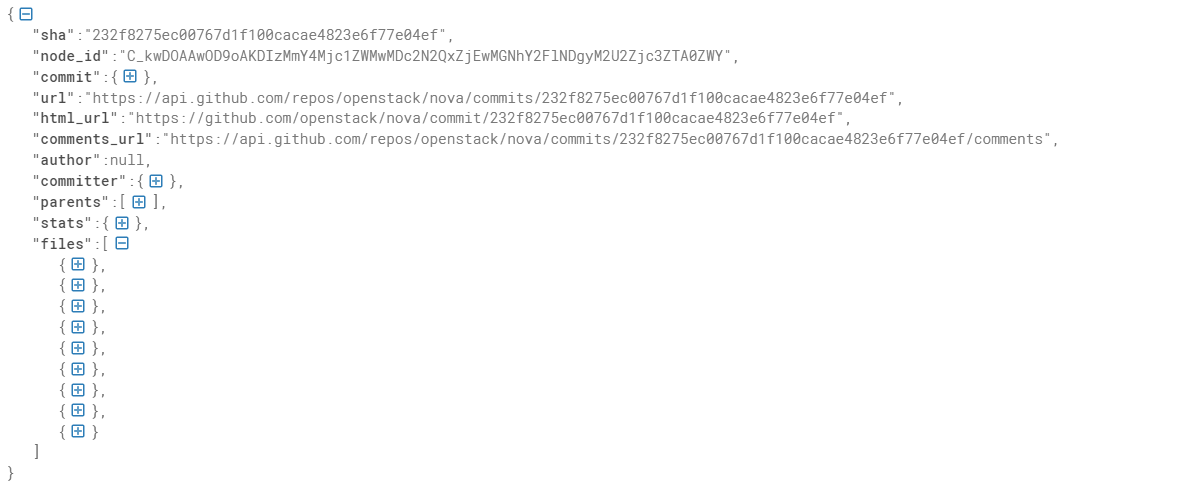

In [5]:
df = pd.json_normalize(data, "files", ["commit_node_id", "commit_sha", "commit_html_url", "commit_date" ])

### 2. Displaying current state of the data

In [6]:
# The first 5 rows
df.head()

,sha,filename,status,additions,deletions,changes,blob_url,raw_url,contents_url,patch,previous_filename,commit_node_id,commit_sha,commit_html_url,commit_date
0,08006e2b92a44b709b3ef6171cfb9a95519c8f5e,nova/compute/api.py,modified,18,4,22,https://github.com/openstack/nova/blob/3a14c1a...,https://github.com/openstack/nova/raw/3a14c1a4...,https://api.github.com/repos/openstack/nova/co...,"@@ -4822,10 +4822,24 @@ def _attach_volume(sel...",NaN,C_kwDOAAwOD9oAKDNhMTRjMWE0Mjc3YTlmNDRiNjdlMDgw...,3a14c1a4277a9f44b67e080138b28b680e5e6824,https://github.com/openstack/nova/commit/3a14c...,2022-02-14T12:37:58Z
1,79a62da21a6d4e768b48f8be3c44e39b9bcd3a83,nova/tests/unit/compute/test_api.py,modified,30,0,30,https://github.com/openstack/nova/blob/3a14c1a...,https://github.com/openstack/nova/raw/3a14c1a4...,https://api.github.com/repos/openstack/nova/co...,"@@ -524,6 +524,36 @@ def test_tagged_volume_at...",NaN,C_kwDOAAwOD9oAKDNhMTRjMWE0Mjc3YTlmNDRiNjdlMDgw...,3a14c1a4277a9f44b67e080138b28b680e5e6824,https://github.com/openstack/nova/commit/3a14c...,2022-02-14T12:37:58Z
2,ef5582543a2ac953179e5dbc3e493e69c9bc84bf,releasenotes/notes/bug-1960401-504eb255253d966...,added,8,0,8,https://github.com/openstack/nova/blob/3a14c1a...,https://github.com/openstack/nova/raw/3a14c1a4...,https://api.github.com/repos/openstack/nova/co...,"@@ -0,0 +1,8 @@\n+---\n+fixes:\n+ - |\n+ T...",NaN,C_kwDOAAwOD9oAKDNhMTRjMWE0Mjc3YTlmNDRiNjdlMDgw...,3a14c1a4277a9f44b67e080138b28b680e5e6824,https://github.com/openstack/nova/commit/3a14c...,2022-02-14T12:37:58Z
3,b3f461cca42b3bc413767649e7284db3c7332f42,nova/api/openstack/compute/deferred_delete.py,modified,1,1,2,https://github.com/openstack/nova/blob/232f827...,https://github.com/openstack/nova/raw/232f8275...,https://api.github.com/repos/openstack/nova/co...,"@@ -40,7 +40,7 @@ def _restore(self, req, id, ...",NaN,C_kwDOAAwOD9oAKDIzMmY4Mjc1ZWMwMDc2N2QxZjEwMGNh...,232f8275ec00767d1f100cacae4823e6f77e04ef,https://github.com/openstack/nova/commit/232f8...,2022-02-10T19:43:54Z
4,59b9c384df60d670f526f91ffb10fa09d12ab7ba,nova/api/openstack/compute/migrate_server.py,modified,1,1,2,https://github.com/openstack/nova/blob/232f827...,https://github.com/openstack/nova/raw/232f8275...,https://api.github.com/repos/openstack/nova/co...,"@@ -57,7 +57,7 @@ def _migrate(self, req, id, ...",NaN,C_kwDOAAwOD9oAKDIzMmY4Mjc1ZWMwMDc2N2QxZjEwMGNh...,232f8275ec00767d1f100cacae4823e6f77e04ef,https://github.com/openstack/nova/commit/232f8...,2022-02-10T19:43:54Z


In [7]:
# The last five rows
df.tail()

,sha,filename,status,additions,deletions,changes,blob_url,raw_url,contents_url,patch,previous_filename,commit_node_id,commit_sha,commit_html_url,commit_date
2209,6b397f5f5cfd4d06687dac0928b33a11a51e860a,doc/source/reference/index.rst,modified,3,0,3,https://github.com/openstack/nova/blob/a7584ec...,https://github.com/openstack/nova/raw/a7584ec1...,https://api.github.com/repos/openstack/nova/co...,"@@ -30,6 +30,8 @@ The following is a dive into...",NaN,MDY6Q29tbWl0NzkwMDMxOmE3NTg0ZWMxYTVmZDA3MzdjYj...,a7584ec1a5fd0737cb56eb2901aed667f0e49394,https://github.com/openstack/nova/commit/a7584...,2021-07-08T15:10:49Z
2210,c84ab26337f5de23e6bc55eac0988063bb83a13b,doc/source/reference/upgrade-checks.rst,modified,96,90,186,https://github.com/openstack/nova/blob/a7584ec...,https://github.com/openstack/nova/raw/a7584ec1...,https://api.github.com/repos/openstack/nova/co...,"@@ -2,6 +2,14 @@\n Upgrade checks\n ==========...",NaN,MDY6Q29tbWl0NzkwMDMxOmE3NTg0ZWMxYTVmZDA3MzdjYj...,a7584ec1a5fd0737cb56eb2901aed667f0e49394,https://github.com/openstack/nova/commit/a7584...,2021-07-08T15:10:49Z
2211,6da9ae060628f408e3188403e9d861946dfa0b54,doc/source/user/index.rst,modified,0,3,3,https://github.com/openstack/nova/blob/a7584ec...,https://github.com/openstack/nova/raw/a7584ec1...,https://api.github.com/repos/openstack/nova/co...,"@@ -72,9 +72,6 @@ Once you are running nova, t...",NaN,MDY6Q29tbWl0NzkwMDMxOmE3NTg0ZWMxYTVmZDA3MzdjYj...,a7584ec1a5fd0737cb56eb2901aed667f0e49394,https://github.com/openstack/nova/commit/a7584...,2021-07-08T15:10:49Z
2212,ef65b8940d24cea8060a3a1756553c29b89c801f,doc/test/redirect-tests.txt,modified,2,1,3,https://github.com/openstack/nova/blob/a7584ec...,https://github.com/openstack/nova/raw/a7584ec1...,https://api.github.com/repos/openstack/nova/co...,"@@ -62,13 +62,14 @@\n /nova/latest/testing/ser...",NaN,MDY6Q29tbWl0NzkwMDMxOmE3NTg0ZWMxYTVmZDA3MzdjYj...,a7584ec1a5fd0737cb56eb2901aed667f0e49394,https://github.com/openstack/nova/commit/a7584...,2021-07-08T15:10:49Z
2213,c71e899fd4872cb3b1680ea2a95d6a5ea6f91568,api-guide/source/accelerator-support.rst,modified,54,0,54,https://github.com/openstack/nova/blob/2226ec4...,https://github.com/openstack/nova/raw/2226ec4e...,https://api.github.com/repos/openstack/nova/co...,"@@ -87,3 +87,57 @@ For nested resource provide...",NaN,MDY6Q29tbWl0NzkwMDMxOjIyMjZlYzRlM2I5ZWNiZDA3MG...,2226ec4e3b9ecbd070f1545e40063ede1f1aa44a,https://github.com/openstack/nova/commit/2226e...,2021-08-12T03:06:03Z


In [8]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214 entries, 0 to 2213
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sha                2214 non-null   object
 1   filename           2214 non-null   object
 2   status             2214 non-null   object
 3   additions          2214 non-null   int64 
 4   deletions          2214 non-null   int64 
 5   changes            2214 non-null   int64 
 6   blob_url           2214 non-null   object
 7   raw_url            2214 non-null   object
 8   contents_url       2214 non-null   object
 9   patch              2174 non-null   object
 10  previous_filename  40 non-null     object
 11  commit_node_id     2214 non-null   object
 12  commit_sha         2214 non-null   object
 13  commit_html_url    2214 non-null   object
 14  commit_date        2214 non-null   object
dtypes: int64(3), object(12)
memory usage: 259.6+ KB


### 3. Data cleaning

In [9]:
# Removing columns not needed for the analysis
columns = ['previous_filename', 'patch', 'contents_url', 'raw_url', 'previous_filename', 'commit_node_id']
df.drop(columns, inplace=True, axis=1)

In [10]:
# Generating and adding extra columns
df[["directory", "file_name", "file_type"]] = df.apply(lambda x: path_parameters(x), axis=1, result_type="expand")

In [11]:
# Delete the previous filename column as it is no longer required
df.drop("filename", inplace=True, axis=1)

In [12]:
# Rename columns
df.rename(columns={"sha": "file_sha", "status": "file_status", "additions":"no_of_additions", "deletions": "no_of_deletions"}, inplace=True)

In [13]:
# Optimising the data frame by correcting the data types. 
# This will also make more operations possible on the data frame

df = df.astype({'file_sha': 'str', 'file_status': 'category', 'no_of_additions':'int', 'no_of_deletions':'int', 'changes':'int', 'blob_url':'str', 'commit_sha':'str', 'commit_html_url':'str', 'commit_date':'str', 'directory':'str', 'file_name':'str', 'file_type':'category'})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214 entries, 0 to 2213
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   file_sha         2214 non-null   object  
 1   file_status      2214 non-null   category
 2   no_of_additions  2214 non-null   int32   
 3   no_of_deletions  2214 non-null   int32   
 4   changes          2214 non-null   int32   
 5   blob_url         2214 non-null   object  
 6   commit_sha       2214 non-null   object  
 7   commit_html_url  2214 non-null   object  
 8   commit_date      2214 non-null   object  
 9   directory        2214 non-null   object  
 10  file_name        2214 non-null   object  
 11  file_type        2214 non-null   category
dtypes: category(2), int32(3), object(7)
memory usage: 152.3+ KB


### Basic Analysis and Visualization

#### 1. Total number of commits that occured during the studied period.

In [15]:
# value_counts returns a series object counting all unique values with the 1st value being the most frequently occuring
df["commit_sha"].value_counts()

0d1dd103d1431400b04f5f3edcb0d48453a79151    164
f3d48000b139ec38d92da276a43a8387f76cbc89     83
0e0196d979cf1b8e63b9656358116a36f1f09ede     83
3ac73ada33e5d4ae7fc264cb13b46788ae706244     54
ccef1940bf92da7441beb6b88fa9f998b1e9b2b2     36
                                           ... 
fa35cfa9983e098455d9dfc1daa87f8be4cf57d4      1
0d0de2e448ebfe0485eb1714b1f9d81b807c7128      1
6e1b22581f3c4c0b3017b189a174c659905bbc3a      1
c98f1f8943af0b2e21c910591ee99d7ec3a023c1      1
2226ec4e3b9ecbd070f1545e40063ede1f1aa44a      1
Name: commit_sha, Length: 470, dtype: int64

In [16]:
print("The total no. of processed commits is: {commits_total}".format(commits_total = len(df["commit_sha"].value_counts())))

The total no. of processed commits is: 470


#### 2. The 12 most modified files 

In [25]:
df["file_name"].value_counts().head(12)

driver.py                           77
api.py                              58
test_driver.py                      48
test_api.py                         47
nova.py                             45
neutron.py                          42
manager.py                          39
test_migrations.py                  39
test_servers_resource_request.py    37
test_neutron.py                     35
test_compute.py                     32
test_servers.py                     32
Name: file_name, dtype: int64

Text(0, 0.5, 'File Names')

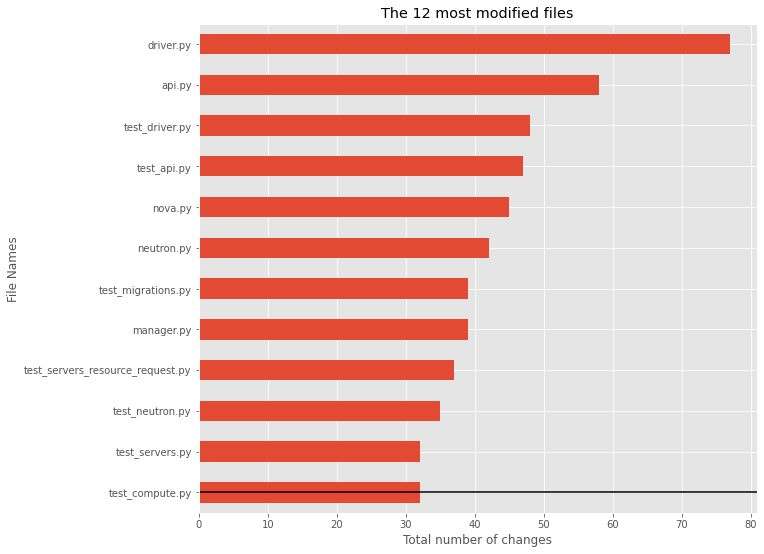

In [69]:
df["file_name"].value_counts().head(12).sort_values().plot.barh(figsize=(10, 9)); plt.axhline(0, color='k'); plt.title('The 12 most modified files'); plt.xlabel('Total number of changes'); plt.ylabel('File Names')

#### 3. The 5 most modified directories

In [55]:
df["directory"].value_counts().head(5)

nova/tests/unit/compute    108
nova/objects                97
nova/tests/functional       92
nova/compute                83
                            80
Name: directory, dtype: int64

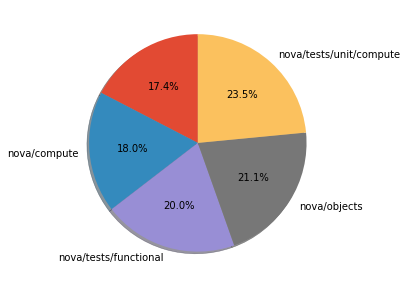

In [64]:
df["directory"].value_counts().head(5).sort_values().plot.pie(autopct='%1.1f%%', figsize=(10,5),
        shadow=True, startangle=90, ylabel="");

#### 4. The most used file type

In [20]:
df["file_type"].value_counts()

.py      1789
.rst      170
.yaml     110
.txt       34
.json      31
.tpl       21
.ini       19
           14
.inc        8
.cfg        7
.mako       4
.sh         4
.conf       3
Name: file_type, dtype: int64

Text(0, 0.5, 'Total number of files')

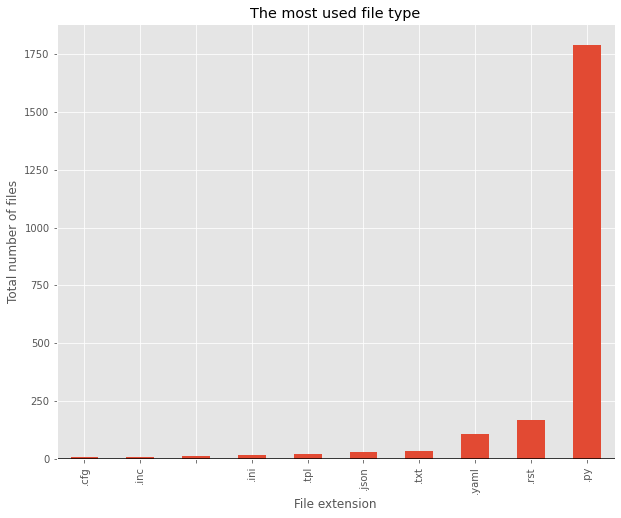

In [56]:
df["file_type"].value_counts().head(10).sort_values().plot.bar(figsize=(10, 8)); plt.axhline(0, color='k'); plt.title('The most used file type'); plt.xlabel('File extension'); plt.ylabel('Total number of files')

#### 5. Churn

In [57]:
# sum of all changes that occured during the period
df["changes"].sum()

94432

### Findings

The key technology in use in the project is python and lots of efforts are geared towards testing both unit and functional test.